# 2 - Factors of Dominance

In the [previous section](https://github.com/inm2/Damwon-Analysis/blob/main/1%20-%20Damwon%20Season%20At%20A%20Glance.ipynb), I looked at DAMWON Gaming's spring and summer splits at a short glance. I compiled the KDA of each player in both seasons to see how well they performed. In the spring regular season, BeryL, ShowMaker, and Ghost were the only Damwon players that reached the Top 5 in KDA. In the summer, however, they dominated in this category, with all five of the players in the Top 2 for KDA in the regular season.

Note: The main caveat for including playoffs with the regular season is a slight skew in the amount of games played if a lower seeded team advances far into the bracket. The top team from the regular season receives an automatic bid to the finals. (The lower the seed, the higher amount of matches.)

My objective for this project is to understand one of the factors as to why they had an outstanding summer split, their Gold Difference.  

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

#Importing Files
nuclear = pd.read_csv(r'Damwon Nuclear Analysis.csv')
ShowMaker_spring = pd.read_csv(r'Damwon ShowMaker Analysis_Spring.csv')
ShowMaker_summer = pd.read_csv(r'Damwon ShowMaker Analysis_Summer.csv')
GD_spring = pd.read_csv(r'Damwon Team CSD_Spring.csv')
GD_summer = pd.read_csv(r'Damwon Team CSD_Summer.csv')

## Gold and Creep Score Difference by Player

In the early portion of League of Legends, farming, the act of killing minions and mosters to gain experience or gold, is a critical aspect of the game. To get gold, a player must land the last hit on a minion or monster. The gold can be exchanged for items and abilities to increase a champion's power. The more purchasing power a player has, the more powerful they are. Creep Score (CS) is the metric to define how well a player is landing these last hits to get gold. Gold can also be obtained through various means (objectives, kills on other players, etc.) that are independent from CS.  

To compare how well a position is doing vs an opponent, Creep Score Difference (CSD) and Gold Difference (GD) can be used. Both metrics can be used to show lane dominance, or lack of, how early game dominant a team is, and a jungle position's tendencies. [Per Tim Sevenhuysen, a gold lead of +1000 at the 15-minute mark in a game correlates to a  66.2% win probability.](https://oracleselixir.com/blog/post/9610/win-probability-calculator-updated-for-2019) 

To compare how well the team did as a whole in the regular seasons for spring and summer splits, in terms of GD, Damwon was 6th in the Spring (-1,419 from 1st place), and 1st in the Summer (+1,801 ahead of 2nd).

Since Damwon was a middle-of-the-table team in the Spring split, I conducted a query to show how each team member performed with these metrics in the spring and then in the summer.  

Variables:
- golddiffat10 - Gold difference at the 10-minute mark  
- golddiffat15 - Gold difference at the 15-minute mark  
- csdiffat10 - Creep score difference at the 10-minute mark  
- csdiffat15 - Creep score difference at the 15-minute mark  

The averages for GD and CSD were taken when querying the data in SQL:  
```SELECT player, position, count(player) as appearances, AVG(golddiffat10) as GoldDiff10, AVG(golddiffat15) as GoldDiff15, AVG(csdiffat10) as CSDiff10, AVG(csdiffat15) as CSDiff15  
FROM `league`.`2020leagueinfo`  
WHERE team = 'DAMWON Gaming' AND split = "Spring"  
GROUP BY player;```  



In [10]:
print("GD and CSD - Damwon, Spring 2020 (Reg Season and Playoffs)")
print(GD_spring)
print("\nGD and CSD - Damwon, Summer 2020 (Reg Season and Playoffs)")
print(GD_summer)

GD and CSD - Damwon, Spring 2020 (Reg Season and Playoffs)
      player position  appearances  GoldDiff10  GoldDiff15  CSDiff10  CSDiff15
0     Nuguri      top           51    103.9608    419.3137    5.5294    7.7451
1     Canyon      jng           51   -158.8039   -134.2941    0.0784    0.0588
2  ShowMaker      mid           51    -15.8824     46.4314    1.1373    1.6471
3    Nuclear      bot           26   -274.1923   -468.1538   -8.8846  -10.8846
4       Hoit      sup           13     33.1538     34.4615   -0.6154   -0.6923
5      BeryL      sup           38     35.2632    134.3421    9.1579   15.4211
6      Ghost      bot           25   -184.8400   -388.8800  -15.0800  -25.6000

GD and CSD - Damwon, Summer 2020 (Reg Season and Playoffs)
      player position  appearances  GoldDiff10  GoldDiff15  CSDiff10  CSDiff15
0     Nuguri      top           42    346.4762   1034.1429    5.6905   11.1429
1     Canyon      jng           42    368.1667    869.2619    7.2143   13.5238
2  ShowMaker

To get a summary of how a player performed in respect to GD and CSD, I used a histogram on Nuclear's stats in the spring, and subsequently for ShowMaker's spring and summer splits (regular season + playoffs for both). The histogram represents an approximation of how the data is distributed. ShowMaker's Summer Split puts into context his overwhelmingly positive Gold Difference. 

### Nuclear's Gold Difference and Creep Score Difference (Spring Split 2020)

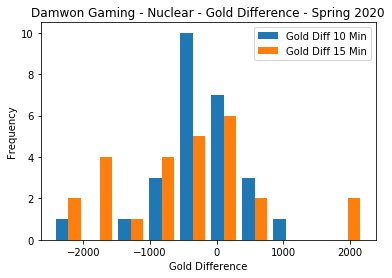

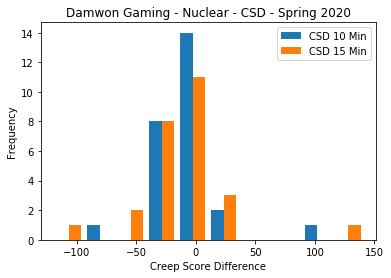

In [11]:
#Getting Gold Difference and Creep Score Difference for Nuclear
nuclear_gdif10 = nuclear['golddiffat10']
nuclear_gdif15 = nuclear['golddiffat15']
nuclear_csd10 = nuclear['csdiffat10']
nuclear_csd15 = nuclear['csdiffat15']

#Setting up sub-plots
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
n, bins, patches = ax1.hist([nuclear_gdif10,nuclear_gdif15])
ax1.set_xlabel('Gold Difference')
ax1.set_ylabel('Frequency')
ax1.set_title('Damwon Gaming - Nuclear - Gold Difference - Spring 2020')
ax1.legend(['Gold Diff 10 Min','Gold Diff 15 Min'])

fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
n, bins, patches = ax2.hist([nuclear_csd10,nuclear_csd15])
ax2.set_xlabel('Creep Score Difference')
ax2.set_ylabel('Frequency')
ax2.set_title('Damwon Gaming - Nuclear - CSD - Spring 2020')
ax2.legend(['CSD 10 Min','CSD 15 Min'])

### ShowMaker's GD and CSD (Spring and Summer 2020 Splits)

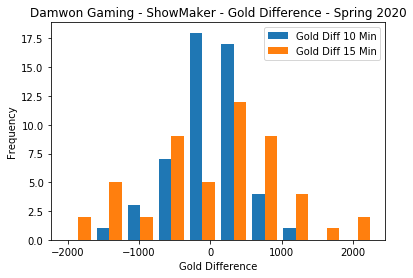

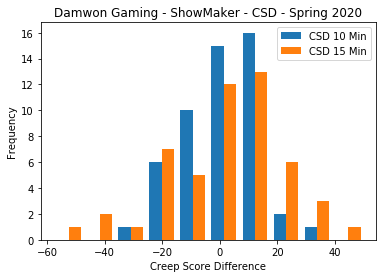

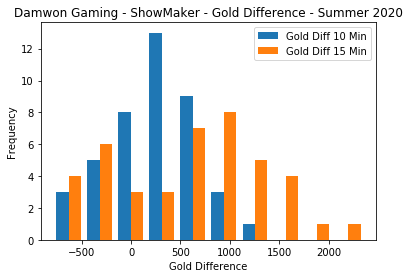

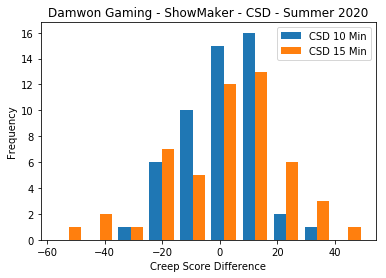

In [12]:
#ShowMaker Spring stats
sprMaker_gdif10 = ShowMaker_spring['golddiffat10']
sprMaker_gdif15 = ShowMaker_spring['golddiffat15']
sprMaker_csd10 = ShowMaker_spring['csdiffat10']
sprMaker_csd15 = ShowMaker_spring['csdiffat15']

#ShowMaker Summer stats
sumMaker_gdif10 = ShowMaker_summer['golddiffat10']
sumMaker_gdif15 = ShowMaker_summer['golddiffat15']
sumMaker_csd10 = ShowMaker_summer['csdiffat10']
sumMaker_csd15 = ShowMaker_summer['csdiffat15']

#Subplots for Spring Split
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)
n,bins,patches = ax3.hist([sprMaker_gdif10,sprMaker_gdif15])
ax3.set_xlabel('Gold Difference')
ax3.set_ylabel('Frequency')
ax3.set_title('Damwon Gaming - ShowMaker - Gold Difference - Spring 2020')
ax3.legend(['Gold Diff 10 Min','Gold Diff 15 Min'])

fig4 = plt.figure()
ax4 = fig4.add_subplot(1,1,1)
n,bins,patches = ax4.hist([sprMaker_csd10,sprMaker_csd15])
ax4.set_xlabel('Creep Score Difference')
ax4.set_ylabel('Frequency')
ax4.set_title('Damwon Gaming - ShowMaker - CSD - Spring 2020')
ax4.legend(['CSD 10 Min','CSD 15 Min'])

#Subplots for Summer Split
fig5 = plt.figure()
ax5 = fig5.add_subplot(1,1,1)
n,bins,patches = ax5.hist([sumMaker_gdif10,sumMaker_gdif15])
ax5.set_xlabel('Gold Difference')
ax5.set_ylabel('Frequency')
ax5.set_title('Damwon Gaming - ShowMaker - Gold Difference - Summer 2020')
ax5.legend(['Gold Diff 10 Min','Gold Diff 15 Min'])

fig6 = plt.figure()
ax6 = fig6.add_subplot(1,1,1)
n,bins,patches = ax6.hist([sprMaker_csd10,sprMaker_csd15])
ax6.set_xlabel('Creep Score Difference')
ax6.set_ylabel('Frequency')
ax6.set_title('Damwon Gaming - ShowMaker - CSD - Summer 2020')
ax6.legend(['CSD 10 Min','CSD 15 Min'])

## Caveat and Future Work

Ultimately, GD and CSD are just two metrics that have been analyzed independently from other metrics. [This post shows the influence dragons have on win probabilities.](https://oracleselixir.com/blog/post/10689/early-game-rating-2-0)

Since Gold Difference and Dragons can be an indicator whether or not a team wins, the next logical step is to incorporate a logistical or linear model to see if the outcome of games can be predicted. 